In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from imblearn.over_sampling import SMOTE



In [2]:

haberman = pd.read_csv('haberman.csv')
haberman.columns = ['Age','Year','Node','Survival']

haberman.head()

,Age,Year,Node,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Node      305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
haberman.isnull().sum()

Age         0
Year        0
Node        0
Survival    0
dtype: int64

In [5]:
haberman.corr()

,Age,Year,Node,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Node,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


In [6]:
haberman['Survival'].value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [7]:
X = haberman.drop('Survival',axis=1)
Y = haberman['Survival']

print(f'Shape of X index 0 : {X.shape[0]}')
print(f'Shape of X index 1 : {X.shape[1]}')
print(f'Shape of Y : {Y.shape[0]}')


Shape of X index 0 : 305
Shape of X index 1 : 3
Shape of Y : 305


In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(244, 3) (61, 3) (244,) (61,)


In [9]:

tree = DecisionTreeClassifier(max_depth=5,min_samples_split=2,random_state=0)

tree.fit(X_train,Y_train)

X_train_pred = tree.predict(X_train)
X_test_pred = tree.predict(X_test)

train_acc = accuracy_score(Y_train,X_train_pred)
test_acc = accuracy_score(Y_test,X_test_pred)

print(f'train accuracy : {train_acc}')
print(f'test accuracy : {test_acc}')


train accuracy : 0.819672131147541
test accuracy : 0.7213114754098361


In [10]:
print("Classification report - Training Set")
print(f"{classification_report(Y_train,X_train_pred,target_names=['Alive','Dead'])}")
print("Classification report - Testing Set")
print(f"{classification_report(Y_test,X_test_pred,target_names=['Alive','Dead'])}")

Classification report - Training Set
              precision    recall  f1-score   support

       Alive       0.85      0.92      0.88       179
        Dead       0.71      0.54      0.61        65

    accuracy                           0.82       244
   macro avg       0.78      0.73      0.75       244
weighted avg       0.81      0.82      0.81       244

Classification report - Testing Set
              precision    recall  f1-score   support

       Alive       0.79      0.84      0.82        45
        Dead       0.46      0.38      0.41        16

    accuracy                           0.72        61
   macro avg       0.63      0.61      0.62        61
weighted avg       0.71      0.72      0.71        61



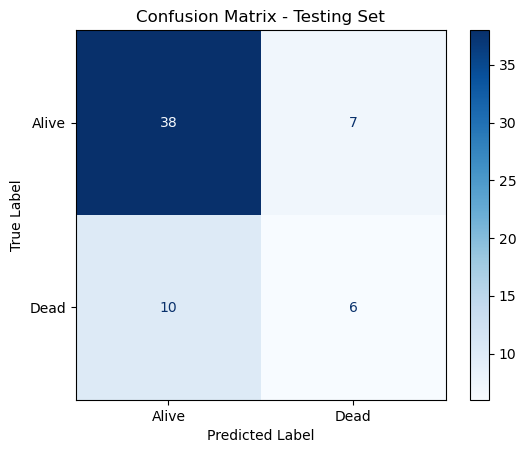

In [11]:

conf_mat = confusion_matrix(Y_test, X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Alive','Dead'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


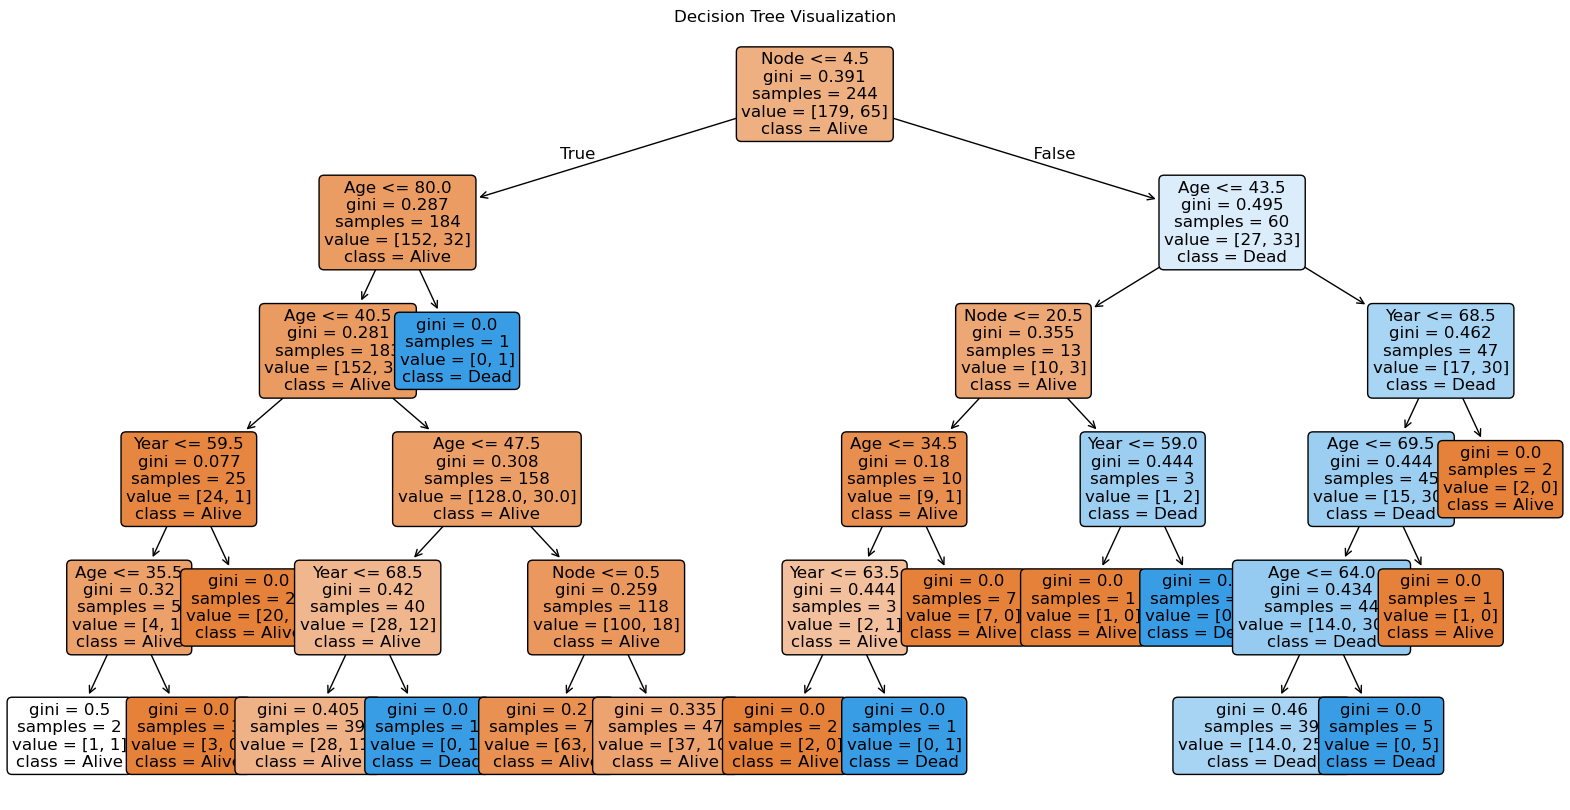

In [12]:
plt.figure(figsize=(20,10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=['Alive','Dead'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Visualization")
plt.show()


In [13]:
param = {
    "max_depth" : [None,2,3,4,5,6,7,8,9,10],
    "min_samples_split" : range(2,20),
    "criterion" : ['gini','entropy','log_loss'],
    "min_samples_leaf" : [1,2,3,4,5],
    "max_features" : ["auto", "sqrt", "log2"]
}

In [14]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid = param,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 8100 candidates, totalling 40500 fits


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
13500 fits failed out of a total of 40500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11787 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Asus\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': range(2, 20)},
             scoring='accuracy', verbose=2)

In [15]:
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Best Parameters from GridSearchCV: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7664


In [16]:
best_tree = grid_search.best_estimator_


X_train_pred_best = best_tree.predict(X_train)
train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Train Accuracy with Best Parameters: {train_accuracy_best:}")

X_test_pred_best = best_tree.predict(X_test)
test_acc_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_acc_best:.4f}")


Train Accuracy with Best Parameters: 0.7540983606557377
Test Accuracy with Best Parameters: 0.7377


In [17]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=['Alive','Dead']))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=['Alive','Dead']))

Classification Report - Training Set (Best Estimator):
              precision    recall  f1-score   support

       Alive       0.76      0.98      0.85       179
        Dead       0.69      0.14      0.23        65

    accuracy                           0.75       244
   macro avg       0.72      0.56      0.54       244
weighted avg       0.74      0.75      0.69       244

Classification Report - Testing Set (Best Estimator):
              precision    recall  f1-score   support

       Alive       0.75      0.96      0.84        45
        Dead       0.50      0.12      0.20        16

    accuracy                           0.74        61
   macro avg       0.63      0.54      0.52        61
weighted avg       0.69      0.74      0.67        61



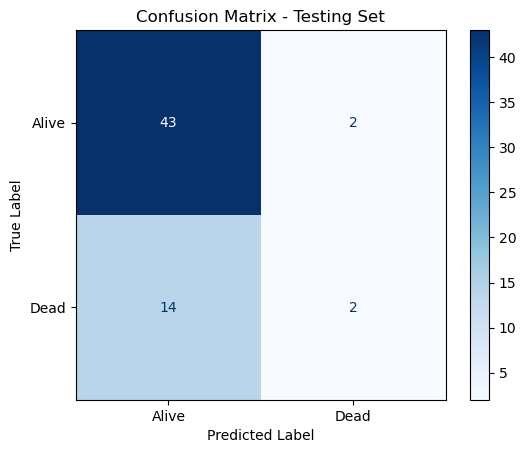

In [18]:

conf_mat = confusion_matrix(Y_test, X_test_pred_best)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Alive','Dead'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [19]:

smote = SMOTE(random_state=0)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print("Class distribution after SMOTE:")
print(Y_train_smote.value_counts())


best_tree.fit(X_train_smote, Y_train_smote)

X_test_pred = best_tree.predict(X_test)

accuracy = accuracy_score(Y_test, X_test_pred)
classification_report_result = classification_report(Y_test, X_test_pred)
confusion_matrix_result = confusion_matrix(Y_test, X_test_pred)

print("Accuracy on Test Data:", accuracy)
print("Classification Report:", classification_report_result)
print("Confusion Matrix:", confusion_matrix_result)


Class distribution after SMOTE:
Survival
1    179
2    179
Name: count, dtype: int64
Accuracy on Test Data: 0.5901639344262295
Classification Report:               precision    recall  f1-score   support

           1       0.74      0.69      0.71        45
           2       0.26      0.31      0.29        16

    accuracy                           0.59        61
   macro avg       0.50      0.50      0.50        61
weighted avg       0.61      0.59      0.60        61

Confusion Matrix: [[31 14]
 [11  5]]
